### Try it 10.1: Decomposing Time Series


<center>
    <img src = './images/spots.png' /><img src = './images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [2]:
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
mpl.rcParams.update({"axes.grid": True})

# Sunspots

In [4]:
sunspots = sm.datasets.sunspots.load_pandas().data
sunspots = sunspots.set_index("YEAR")
sunspots

,SUNACTIVITY
YEAR,
1700.0,5.0
1701.0,11.0
1702.0,16.0
1703.0,23.0
1704.0,36.0
...,...
2004.0,40.4
2005.0,29.8
2006.0,15.2


In [5]:
df = sunspots.query("YEAR > 1900 and YEAR <= 2000")
y_hist = df["SUNACTIVITY"]

In [6]:
period_guess = 12
lows = [0]
next_low_guess = period_guess
search_width = 5

while next_low_guess <= len(df):   
    low_best = next_low_guess
    min_val = np.inf

    for kw in range(-search_width, search_width + 1):
        kidx = next_low_guess + kw
        if kidx < len(df):
            this_val = df.iloc[kidx]["SUNACTIVITY"]
            if this_val < min_val:
                min_val = this_val
                low_best = kidx

    lows.append(low_best)
    next_low_guess = low_best + period_guess
    print("Added low at index %03d with value %5.2f, next guess = %03d" % (low_best, min_val, next_low_guess))

Added low at index 012 with value  1.40, next guess = 024
Added low at index 022 with value  5.80, next guess = 034
Added low at index 032 with value  5.70, next guess = 044
Added low at index 043 with value  9.60, next guess = 055
Added low at index 053 with value  4.40, next guess = 065
Added low at index 063 with value 10.20, next guess = 075
Added low at index 075 with value 12.60, next guess = 087
Added low at index 085 with value 13.40, next guess = 097
Added low at index 095 with value  8.60, next guess = 107


In [7]:
lows

[0, 12, 22, 32, 43, 53, 63, 75, 85, 95]

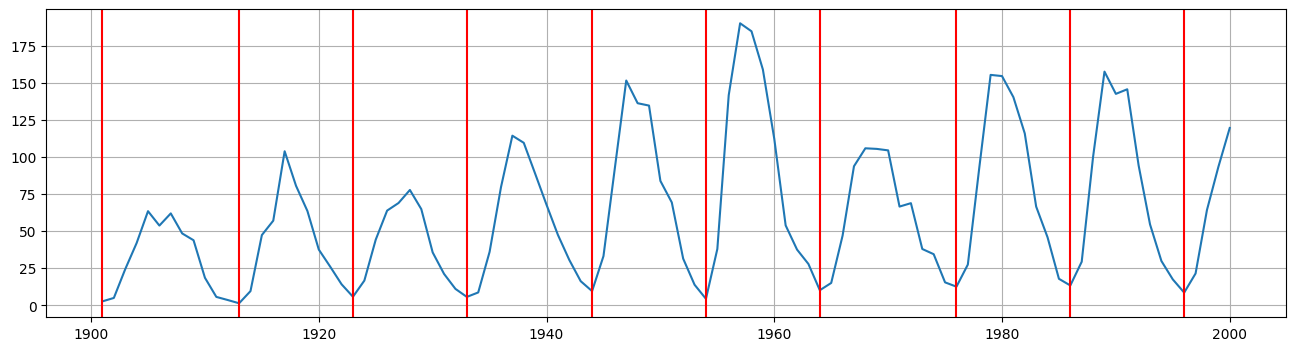

In [8]:
plt.figure(figsize=(16, 4))
plt.plot(y_hist)
for low in lows:
    if low < len(y_hist):
        plt.axvline(x=df.index[low], color="red")
# plt.legend()
plt.show()


## Trend

In [9]:
from statsmodels.tsa.filters.filtertools import convolution_filter
from statsmodels.tsa.seasonal import _extrapolate_trend

In [10]:
avg_period = int(np.round(np.mean(np.diff(np.array(lows)))))
filt = np.ones(avg_period + 1)
filt[0] = 0.5
filt[-1] = 0.5
filt /= avg_period
filt

array([0.04545455, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.04545455])

In [11]:
trend = convolution_filter(y_hist, filt)

In [17]:
y_hist.shape

(100,)

In [16]:
trend.shape

(100,)

In [15]:
_extrapolate_trend(trend, 5)

LinAlgError: Incompatible dimensions

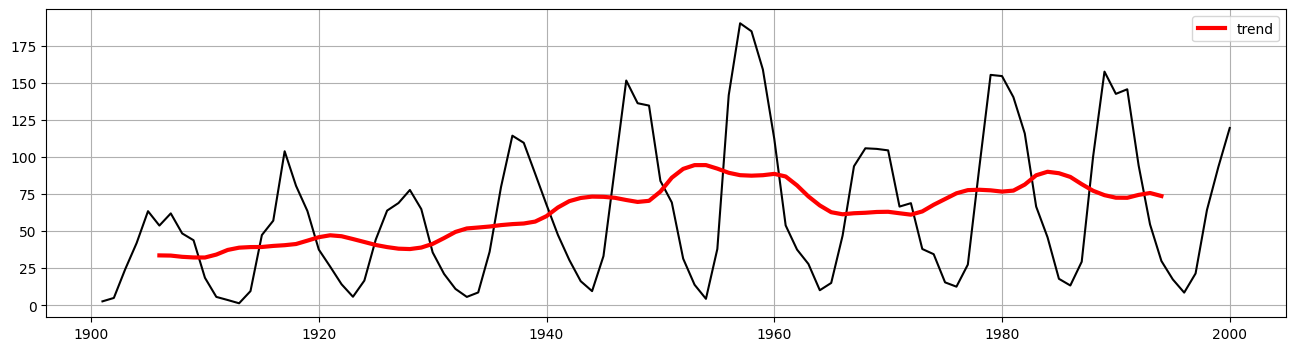

In [12]:
plt.figure(figsize=(16, 4))
plt.plot(y_hist, "k")
plt.plot(trend, "r", linewidth=3, label="trend")
plt.legend()
plt.show()

## Seasonal

# Air Travel

In [13]:
air = pd.read_csv("./data/AirPassengers.csv")

In [14]:
sunspots

,SUNACTIVITY
YEAR,
1700.0,5.0
1701.0,11.0
1702.0,16.0
1703.0,23.0
1704.0,36.0
...,...
2004.0,40.4
2005.0,29.8
2006.0,15.2
